# Visualizations

In [3]:
import tensorflow as tf

from gcpds.image_segmentation.models import unet_baseline
from gcpds.image_segmentation.datasets.segmentation import InfraredThermalFeet
from gcpds.image_segmentation.losses import DiceCoefficient

In [34]:
dataset = InfraredThermalFeet()
train, *_ = dataset()

train = train.map(lambda img,mask,id_img: (img,mask),
                                    num_parallel_calls=tf.data.AUTOTUNE)

shape = 256, 256
train = train.map(lambda img,mask: (tf.image.resize(img,shape), tf.image.resize(mask,shape)),
                                    num_parallel_calls=tf.data.AUTOTUNE)

train = train.batch(1)

 Number of images for Partition 1: 111
 Number of images for Partition 2: 9
 Number of images for Partition 3: 46


In [35]:
model = unet_baseline(input_shape=(256,256,1),out_channels=1)

model.compile(loss=DiceCoefficient(), optimizer=tf.keras.optimizers.Adam())
model.fit(train, epochs=100)

Epoch 1/100
111/111 [==============================] - 16s 20ms/step - loss: -0.5716
Epoch 2/100
111/111 [==============================] - 3s 24ms/step - loss: -0.6899
Epoch 3/100
111/111 [==============================] - 3s 24ms/step - loss: -0.7624
Epoch 4/100
111/111 [==============================] - 2s 20ms/step - loss: -0.8247
Epoch 5/100
111/111 [==============================] - 2s 20ms/step - loss: -0.8361
Epoch 6/100
111/111 [==============================] - 3s 25ms/step - loss: -0.8770
Epoch 7/100
111/111 [==============================] - 2s 19ms/step - loss: -0.8994
Epoch 8/100
111/111 [==============================] - 2s 19ms/step - loss: -0.9221
Epoch 9/100
111/111 [==============================] - 2s 19ms/step - loss: -0.9386
Epoch 10/100
111/111 [==============================] - 3s 26ms/step - loss: -0.9342
Epoch 11/100
111/111 [==============================] - 2s 20ms/step - loss: -0.9361
Epoch 12/100
111/111 [==============================] - 2s 20ms/step - lo

In [36]:
import matplotlib.pyplot as plt
from gcpds.image_segmentation.visualizations import plot_contour

In [40]:
img, mask = train.take(1).get_single_element()
pred_mask = model.predict(img)

1/1 [==============================] - 0s 23ms/step


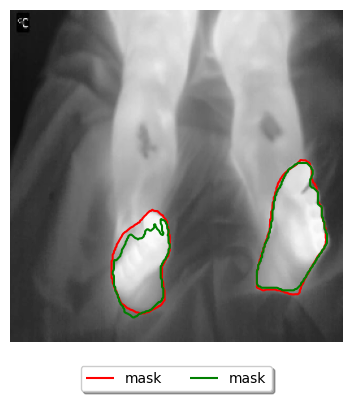

In [41]:
img = img[0,...,0]
mask = mask[0,...,0]
pred_mask = pred_mask[0,...,0]


fig, ax = plt.subplots()
mask_info = (mask,'mask','red'), (pred_mask,'mask','green')
ax = plot_contour(img=img, masks=mask_info, ax= ax)